In [2]:
import os
import zipfile as zf

# Path to the repaired ZIP file
zip_file_path = "PartB_DFU_dataset - Copy.zip"
extract_path = "DFU_dataset"

if os.path.exists(zip_file_path):
    try:
        with zf.ZipFile(zip_file_path, 'r') as files:
            files.extractall(extract_path)
        print(f"Extraction completed successfully to '{extract_path}'")
    except zf.BadZipFile:
        print("Error: The ZIP file is corrupted.")
    except OSError as e:
        print(f"OS error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"Error: The file '{zip_file_path}' does not exist.")

Extraction completed successfully to 'DFU_dataset'


In [3]:
import numpy as np # linear algebra
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
# Define the root directory where your image folders are located
root_directory = "/DFU_dataset/PartB_DFU_dataset - Copy"

# Initialize lists to store image paths and corresponding class labels for both datasets
image_paths_ischaemia = []
categories_ischaemia = []
image_paths_infection = []
categories_infection = []

# Iterate over each class and its subdirectories
for class_name in ["Infection", "Ischaemia"]:
    for augmentation_type in ["Aug-Negative", "Aug-Positive"]:
        folder_path = os.path.join(root_directory, class_name, augmentation_type)
        category = f"{class_name.lower()}{'pov' if 'Positive' in augmentation_type else 'neg'}"
        
        # Iterate over image files in the current directory
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".jpg"):  # Assuming images are jpg format
                image_path = os.path.join(folder_path, file_name)
                if class_name == "Ischaemia":
                    image_paths_ischaemia.append(image_path)
                    categories_ischaemia.append("ischemia" if "Positive" in augmentation_type else "non-ischemia")
                elif class_name == "Infection":
                    image_paths_infection.append(image_path)
                    categories_infection.append("infection" if "Positive" in augmentation_type else "non-infection")

# Create DataFrames for each dataset
df_ischaemia = pd.DataFrame({"category": categories_ischaemia, "image_path": image_paths_ischaemia})
df_infection = pd.DataFrame({"category": categories_infection, "image_path": image_paths_infection})

# Label encoding for Ischaemia dataset
label_encoder_ischaemia = LabelEncoder()
df_ischaemia['Class_Label'] = label_encoder_ischaemia.fit_transform(df_ischaemia['category'])
print("Ischaemia Class Mapping:")
for class_label, numerical_label in zip(df_ischaemia['category'].unique(), df_ischaemia['Class_Label'].unique()):
    print(f"{class_label}: {numerical_label}")

# Label encoding for Infection dataset
label_encoder_infection = LabelEncoder()
df_infection['Class_Label'] = label_encoder_infection.fit_transform(df_infection['category'])
print("Infection Class Mapping:")
for class_label, numerical_label in zip(df_infection['category'].unique(), df_infection['Class_Label'].unique()):
    print(f"{class_label}: {numerical_label}")

# Shuffle both DataFrames
df_ischaemia = df_ischaemia.sample(frac=1).reset_index(drop=True)
df_infection = df_infection.sample(frac=1).reset_index(drop=True)

# Helper function to load and process images
def load_images(df):
    images = []
    target_labels = []   
    for index, row in df.iterrows():
        image = Image.open(row['image_path'])
        image_array = np.array(image.resize((224, 224)))  # Resize image to fit MobileNet input size
        images.append(image_array)
        target_labels.append(row['Class_Label'])
    return np.array(images), np.array(target_labels)

# Load images for both datasets
images_ischaemia, target_labels_ischaemia = load_images(df_ischaemia)
images_infection, target_labels_infection = load_images(df_infection)

print("Shape of Ischaemia images array:", images_ischaemia.shape)
print("Shape of Ischaemia target labels array:", target_labels_ischaemia.shape)
print("Shape of Infection images array:", images_infection.shape)
print("Shape of Infection target labels array:", target_labels_infection.shape)

# Split the Ischaemia dataset
X_train_ischaemia, X_test_ischaemia, y_train_ischaemia, y_test_ischaemia = train_test_split(
    images_ischaemia, target_labels_ischaemia, test_size=0.3, random_state=42)
X_val_ischaemia, X_test_ischaemia, y_val_ischaemia, y_test_ischaemia = train_test_split(
    X_test_ischaemia, y_test_ischaemia, test_size=0.25, random_state=42)  # 0.25 * 0.3 = 0.075

# Split the Infection dataset
X_train_infection, X_test_infection, y_train_infection, y_test_infection = train_test_split(
    images_infection, target_labels_infection, test_size=0.3, random_state=42)
X_val_infection, X_test_infection, y_val_infection, y_test_infection = train_test_split(
    X_test_infection, y_test_infection, test_size=0.25, random_state=42)  # 0.25 * 0.3 = 0.075

print("Ischaemia Training set shape:", X_train_ischaemia.shape, y_train_ischaemia.shape)
print("Ischaemia Validation set shape:", X_val_ischaemia.shape, y_val_ischaemia.shape)
print("Ischaemia Test set shape:", X_test_ischaemia.shape, y_test_ischaemia.shape)
print("Infection Training set shape:", X_train_infection.shape, y_train_infection.shape)
print("Infection Validation set shape:", X_val_infection.shape, y_val_infection.shape)
print("Infection Test set shape:", X_test_infection.shape, y_test_infection.shape)

Ischaemia Class Mapping:
non-ischemia: 1
ischemia: 0
Infection Class Mapping:
non-infection: 1
infection: 0
Shape of Ischaemia images array: (9870, 224, 224, 3)
Shape of Ischaemia target labels array: (9870,)
Shape of Infection images array: (5890, 224, 224, 3)
Shape of Infection target labels array: (5890,)
Ischaemia Training set shape: (6909, 224, 224, 3) (6909,)
Ischaemia Validation set shape: (2220, 224, 224, 3) (2220,)
Ischaemia Test set shape: (741, 224, 224, 3) (741,)
Infection Training set shape: (4123, 224, 224, 3) (4123,)
Infection Validation set shape: (1325, 224, 224, 3) (1325,)
Infection Test set shape: (442, 224, 224, 3) (442,)


In [4]:
############################################################################
# ELEPHANT HERDING OPTIMIZATION (EHO) Algorithm Implementation
############################################################################

def initial_variables(size, min_values, max_values, target_function, start_init=None):
    dim = len(min_values)
    
    if start_init is not None:
        start_init = np.atleast_2d(start_init)
        n_rows = size - start_init.shape[0]
        if n_rows > 0:
            rows = np.random.uniform(min_values, max_values, (n_rows, dim))
            start_init = np.vstack((start_init[:, :dim], rows))
        else:
            start_init = start_init[:size, :dim]
        
        fitness_values = np.array([target_function(ind) for ind in start_init])
        # Ensure fitness_values is a 2D array for concatenation
        if fitness_values.ndim == 1:
            fitness_values = fitness_values.reshape(-1, 1)
        print(f"Shape of start_init: {start_init.shape}")
        print(f"Shape of fitness_values: {fitness_values.shape}")
        population = np.hstack((start_init, fitness_values))
    else:
        population = np.random.uniform(min_values, max_values, (size, dim))
        fitness_values = np.array([target_function(ind) for ind in population])
        # Ensure fitness_values is a 2D array for concatenation
        if fitness_values.ndim == 1:
            fitness_values = fitness_values.reshape(-1, 1)
        print(f"Shape of population: {population.shape}")
        print(f"Shape of fitness_values: {fitness_values.shape}")
        population = np.hstack((population, fitness_values))
    
    return population

# Modify target_function to include LSTM hyperparameters
def target_function(hyperparams):
    # Extract learning rate, batch size, LSTM units, and dropout rates from hyperparams
    learning_rate = hyperparams[0]
    batch_size = int(hyperparams[1])
    
    lstm_units_1 = int(hyperparams[2])
    dropout_1 = float(hyperparams[3])
    lstm_units_2 = int(hyperparams[4])
    dropout_2 = float(hyperparams[5])
    lstm_units_3 = int(hyperparams[6])
    dropout_3 = float(hyperparams[7])

    # Create a hyperparameter dictionary to pass to the model
    hp = {
        'learning_rate': learning_rate,
        'lstm_units_1': lstm_units_1,
        'dropout_1': dropout_1,
        'lstm_units_2': lstm_units_2,
        'dropout_2': dropout_2,
        'lstm_units_3': lstm_units_3,
        'dropout_3': dropout_3
    }
    
    # Build the CNN-LSTM model
    model = build_cnn_model(hp)
    
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
    
    # Train model with the given batch size and hyperparameters
    history = model.fit(
        X_train_infection, y_train_infection,
        batch_size=batch_size,  
        epochs=10,
        validation_data=(X_val_infection, y_val_infection),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    # Return the validation loss as the evaluation metric
    val_loss = min(history.history['val_loss'])
    return val_loss

def update_herd(population, alpha, beta, best_elephant, idx_b, idx_w, min_values, max_values, target_function):
    old_population = np.copy(population)
    cut = population.shape[0]
    dim = len(min_values)  # Number of hyperparameters (should be 8 in this case)
    
    for i in range(0, cut):
        if i != idx_b and i != idx_w:
            r = np.random.rand(dim)
            # Ensure best_elephant includes all hyperparameters
            population[i, :-1] = np.clip(
                old_population[i, :-1] + alpha * (best_elephant[:-1] - old_population[i, :-1]) * r,
                min_values, max_values
            )
        elif i == idx_b:
            center = np.mean(old_population[:, :-1], axis=0)
            population[i, :-1] = np.clip(beta * center, min_values, max_values)
        elif i == idx_w:
            random_values = np.random.rand(dim)
            population[i, :-1] = np.clip(min_values + (max_values - min_values) * random_values, min_values, max_values)
    
    # Calculate fitness values
    fitness_values = np.array([target_function(ind) for ind in population[:, :-1]])
    population[:, -1] = fitness_values
    
    # Update best and worst indices
    idx_b = np.argmin(population[:, -1])
    idx_w = np.argmax(population[:, -1])
    
    if population[idx_b, -1] < best_elephant[-1]:
        best_elephant = np.copy(population[idx_b, :])
    
    return population, best_elephant, idx_b, idx_w


def elephant_herding_optimization(size=50, alpha=0.5, beta=0.1, min_values=[0.0001], max_values=[0.01], generations=5000, target_function=target_function, verbose=True, start_init=None, target_value=None):
    population = initial_variables(size, min_values, max_values, target_function, start_init)
    idx_b = np.argmin(population[:, -1])
    idx_w = np.argmax(population[:, -1])
    best_elephant = population[idx_b, :]  # Include the entire individual (all hyperparameters)
    min_values = np.array(min_values)
    max_values = np.array(max_values)
    count = 0
    while count <= generations:
        if verbose:    
            print('Generation: ', count, ' f(x) = ', best_elephant[-1])
        population, best_elephant, idx_b, idx_w = update_herd(population, alpha, beta, best_elephant, idx_b, idx_w, min_values, max_values, target_function)
        if target_value is not None:
            if best_elephant[-1] <= target_value:
                count = 2 * generations
            else:
                count = count + 1
        else:
            count = count + 1
    return best_elephant


############################################################################

In [6]:
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, GlobalAveragePooling2D, LSTM, TimeDistributed, Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

# Define the CNN-LSTM model-building function
def build_cnn_model(hp): 
    model = Sequential([
        TimeDistributed(Flatten()),
        LSTM(hp['lstm_units_1'], 
             dropout=hp['dropout_1'], 
             return_sequences=True),
        LSTM(hp['lstm_units_2'], 
             dropout=hp['dropout_2'], 
             return_sequences=True),
        LSTM(hp['lstm_units_3'], 
             dropout=hp['dropout_3'], 
             return_sequences=False),
        Dense(128, activation='relu'),
        Dropout(0.4),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')  # Assuming 2 classes for classification
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp['learning_rate']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define the ranges for learning rate, batch size, and LSTM hyperparameters
min_values = [0.0001, 8, 60, 0.2, 30, 0.2, 10, 0.2]  # min values for hyperparameters
max_values = [0.01, 128, 80, 0.3, 60, 0.3, 30, 0.3]  # max values for hyperparameters

# Now you can use the EHO algorithm as before to optimize these hyperparameters
population = initial_variables(3, min_values, max_values, target_function)
print(population)


2024-12-24 09:50:22.050006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-24 09:50:23.278149: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-12-24 09:50:23.278177: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: d6da58006c21
2024-12-24 09:50:23.278183: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: d6da58006c21
2024-12-24 09:50:23.278301: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 545.23.6
2024-12-24 09:50:23.278315: I external/local_xla/xla

Shape of population: (3, 8)
Shape of fitness_values: (3, 1)
[[9.80664359e-03 2.74433401e+01 7.69545457e+01 2.82310393e-01
  4.51304126e+01 2.60301743e-01 1.27187609e+01 2.07805390e-01
  6.92496538e-01]
 [2.82977802e-03 5.15921085e+01 7.78578562e+01 2.77662087e-01
  4.15658862e+01 2.73599242e-01 1.57263730e+01 2.97382543e-01
  6.92608714e-01]
 [9.30993907e-03 4.97227284e+01 6.71074724e+01 2.13762308e-01
  4.02140707e+01 2.22575296e-01 1.92807027e+01 2.66466328e-01
  6.92889988e-01]]


In [7]:
# Run Elephant Herding Optimization (EHO)
best_params = elephant_herding_optimization(
    size=5,  # Number of elephants
    alpha=0.5, beta=0.1, 
    min_values=min_values, max_values=max_values,
    generations=5,  # Number of generations
    target_function=target_function
)

# Print the best found hyperparameters 
print("Best Hyperparameters: ", best_params)

Shape of population: (5, 8)
Shape of fitness_values: (5, 1)
Generation:  0  f(x) =  0.6923497319221497
Generation:  1  f(x) =  0.6921126246452332
Generation:  2  f(x) =  0.6925487518310547
Generation:  3  f(x) =  0.6920177340507507
Generation:  4  f(x) =  0.6920177340507507
Generation:  5  f(x) =  0.6920177340507507
Best Hyperparameters:  [4.02952864e-04 1.32347143e+01 6.01674507e+01 2.08457611e-01
 3.15083010e+01 2.06133416e-01 1.26140696e+01 2.09941330e-01
 6.92017734e-01]


In [8]:
# Extract the best hyperparameters from the EHO result
best_learning_rate = best_params[0]  # First parameter: learning rate
best_batch_size = int(best_params[1])  # Second parameter: batch size (convert to int)

# Extract LSTM hyperparameters from best_params
best_lstm_units_1 = int(best_params[2])  # LSTM layer 1 units
best_dropout_1 = float(best_params[3])   # LSTM layer 1 dropout
best_lstm_units_2 = int(best_params[4])  # LSTM layer 2 units
best_dropout_2 = float(best_params[5])   # LSTM layer 2 dropout
best_lstm_units_3 = int(best_params[6])  # LSTM layer 3 units
best_dropout_3 = float(best_params[7])   # LSTM layer 3 dropout

# Create a dictionary for the best hyperparameters
hp_best = {
    'learning_rate': best_learning_rate,
    'lstm_units_1': best_lstm_units_1,
    'dropout_1': best_dropout_1,
    'lstm_units_2': best_lstm_units_2,
    'dropout_2': best_dropout_2,
    'lstm_units_3': best_lstm_units_3,
    'dropout_3': best_dropout_3
}

# Build the CNN-LSTM model using the best hyperparameters
model = build_cnn_model(hp_best)

# Set up callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

import time
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Start training time
start_train_time = time.time()

# Train the model with the best hyperparameters
history = model.fit(
    X_train_infection, y_train_infection,
    epochs=20,  # Adjust as needed
    batch_size=best_batch_size,
    validation_data=(X_val_infection, y_val_infection),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# End training time
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Collect training metrics
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
train_f1 = f1_score(y_train_infection, np.argmax(model.predict(X_train_infection), axis=1), average='macro')
train_precision = precision_score(y_train_infection, np.argmax(model.predict(X_train_infection), axis=1), average='macro')
train_recall = recall_score(y_train_infection, np.argmax(model.predict(X_train_infection), axis=1), average='macro')

# Collect validation metrics
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_f1 = f1_score(y_val_infection, np.argmax(model.predict(X_val_infection), axis=1), average='macro')
val_precision = precision_score(y_val_infection, np.argmax(model.predict(X_val_infection), axis=1), average='macro')
val_recall = recall_score(y_val_infection, np.argmax(model.predict(X_val_infection), axis=1), average='macro')

# Start testing time
start_test_time = time.time()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_infection, y_test_infection, verbose=1)
y_test_pred = model.predict(X_test_infection)
y_test_classes = np.argmax(y_test_pred, axis=1)

# End testing time
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Collect testing metrics
test_f1 = f1_score(y_test_infection, y_test_classes, average='macro')
test_precision = precision_score(y_test_infection, y_test_classes, average='macro')
test_recall = recall_score(y_test_infection, y_test_classes, average='macro')

# Compile all metrics into a dictionary
metrics = {
    'Training Accuracy': train_acc,
    'Training Loss': train_loss,
    'Training F1 Score': train_f1,
    'Training Precision': train_precision,
    'Training Recall': train_recall,
    'Training Time (s)': training_time,
    'Validation Accuracy': val_acc,
    'Validation Loss': val_loss,
    'Validation F1 Score': val_f1,
    'Validation Precision': val_precision,
    'Validation Recall': val_recall,
    'Test Accuracy': test_acc,
    'Test Loss': test_loss,
    'Test F1 Score': test_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Testing Time (s)': testing_time
}

# Print the collected metrics
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Epoch 1/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 65s 187ms/step - accuracy: 0.5043 - loss: 0.9109 - val_accuracy: 0.4815 - val_loss: 0.7044 - learning_rate: 4.0295e-04
Epoch 2/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 58s 182ms/step - accuracy: 0.5097 - loss: 0.7906 - val_accuracy: 0.4875 - val_loss: 0.7051 - learning_rate: 4.0295e-04
Epoch 3/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 58s 181ms/step - accuracy: 0.4971 - loss: 0.7661 - val_accuracy: 0.4853 - val_loss: 0.7055 - learning_rate: 4.0295e-04
Epoch 4/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 58s 181ms/step - accuracy: 0.4932 - loss: 0.7489 - val_accuracy: 0.5004 - val_loss: 0.7095 - learning_rate: 8.0591e-05
Epoch 5/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 58s 181ms/step - accuracy: 0.5136 - loss: 0.7298 - val_accuracy: 0.4815 - val_loss: 0.6957 - learning_rate: 8.0591e-05
Epoch 6/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 58s 181ms/step - accuracy: 0.4963 - loss: 0.7385 - val_accuracy: 0.4838 - val_loss: 0.6958 - learning_rate: 8.0591e-05
Epoch 7/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 58s 18

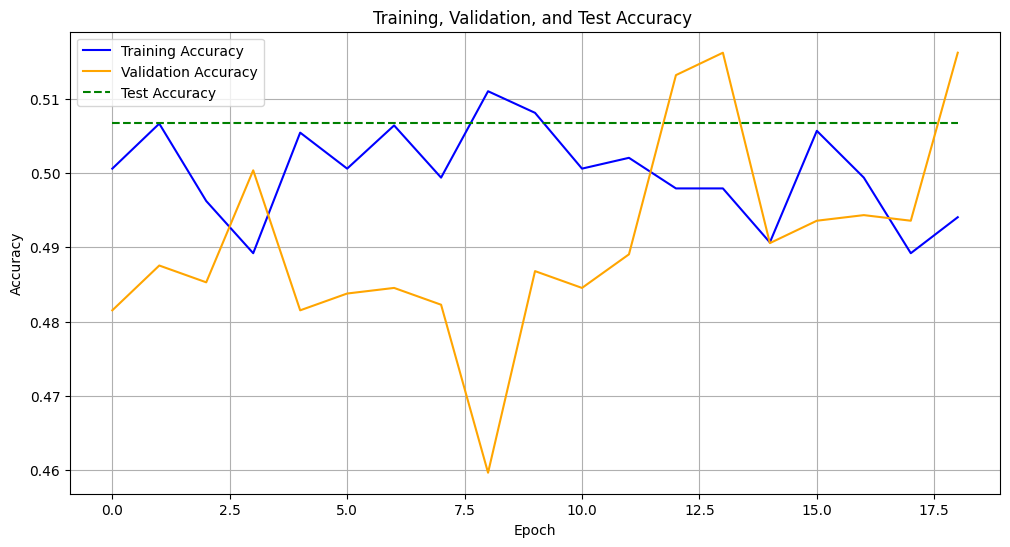

In [11]:
import matplotlib.pyplot as plt
# Plot training, validation, and test accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
# Validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
# Test accuracy
plt.plot([0, len(history.history['accuracy']) - 1], [metrics['Test Accuracy']] * 2, label='Test Accuracy', linestyle='--', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy ')
plt.grid(True)
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


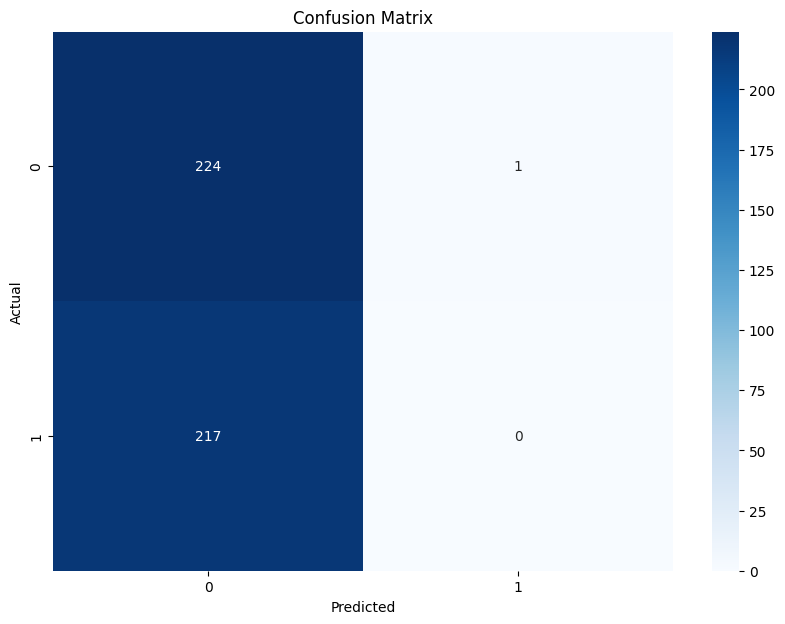

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Predictions for the test set
y_test_pred = model.predict(X_test_infection)
y_pred_classes = np.argmax(y_test_pred, axis=1)
# Assuming y_test and y_pred_classes are already defined
cm = confusion_matrix(y_test_infection, y_pred_classes)

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_infection), yticklabels=np.unique(y_test_infection))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
